<a href="https://colab.research.google.com/github/BakJungHo/PaCO/blob/main/%ED%95%B4%EC%BB%A4%ED%86%A4/%EC%9D%BC%EB%B3%84_%EC%99%B8%EA%B5%AD%EC%9D%B8%EC%88%9C%EB%A7%A4%EC%88%98_IQR%EC%9D%B4%EC%83%81%EC%B9%98%EC%A0%9C%EA%B1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp

In [215]:
df = pd.read_csv('/content/drive/MyDrive/Finance data/pre_kospi.csv')
df

,Unnamed: 0,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수
0,0,2657.13,-0.0176,2022-04-25,10221,-6542,-3825
1,1,2704.71,-0.0086,2022-04-22,8362,-1556,-6975
2,2,2728.21,0.0035,2022-04-21,-5667,-597,6366
3,3,2718.69,-0.0001,2022-04-20,738,948,-1612
4,4,2718.89,0.0095,2022-04-19,-3431,331,3364
...,...,...,...,...,...,...,...
4276,4276,870.84,-0.0005,2005-01-07,1143,178,-1321
4277,4277,871.28,-0.0157,2005-01-06,858,-6,-852
4278,4278,885.19,-0.0019,2005-01-05,10,246,-256
4279,4279,886.90,-0.0076,2005-01-04,-63,397,-334


In [216]:
df['외국인순매수']

0      -6542
1      -1556
2       -597
3        948
4        331
        ... 
4276     178
4277      -6
4278     246
4279     397
4280     995
Name: 외국인순매수, Length: 4281, dtype: int64

In [217]:
df['외국인순매수'].describe()

count     4281.000000
mean      -143.726933
std       2974.159679
min     -28174.000000
25%      -1506.000000
50%        -63.000000
75%       1322.000000
max      17182.000000
Name: 외국인순매수, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

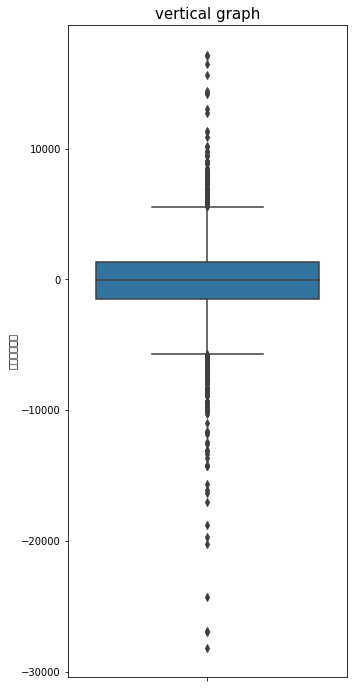

In [218]:
# 세로 그래프
plt.figure(figsize = (5,12))
sns.boxplot(y='외국인순매수', data = df)
plt.title('vertical graph', size = 15)
plt.show()

In [219]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df['외국인순매수'].values, 25)
  quantile_75 = np.percentile(df['외국인순매수'].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df['외국인순매수'][ (df['외국인순매수'] < lowest) | (df['외국인순매수'] > highest) ].index
  return outlier_idx

In [220]:
df

,Unnamed: 0,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수
0,0,2657.13,-0.0176,2022-04-25,10221,-6542,-3825
1,1,2704.71,-0.0086,2022-04-22,8362,-1556,-6975
2,2,2728.21,0.0035,2022-04-21,-5667,-597,6366
3,3,2718.69,-0.0001,2022-04-20,738,948,-1612
4,4,2718.89,0.0095,2022-04-19,-3431,331,3364
...,...,...,...,...,...,...,...
4276,4276,870.84,-0.0005,2005-01-07,1143,178,-1321
4277,4277,871.28,-0.0157,2005-01-06,858,-6,-852
4278,4278,885.19,-0.0019,2005-01-05,10,246,-256
4279,4279,886.90,-0.0076,2005-01-04,-63,397,-334


In [221]:
df['외국인순매수'].loc[outlier_idx]

0       -6542
12      -7683
13      -5836
22      10162
29      -6753
        ...  
3794     7756
3934    -6681
3950    -6899
3962     8942
4014     6481
Name: 외국인순매수, Length: 221, dtype: int64

In [222]:
df_out = df.loc[outlier_idx]
df_out

,Unnamed: 0,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수
0,0,2657.13,-0.0176,2022-04-25,10221,-6542,-3825
12,12,2695.86,-0.0143,2022-04-07,12799,-7683,-5203
13,13,2735.03,-0.0088,2022-04-06,11402,-5836,-5658
22,22,2729.66,-0.0020,2022-03-24,5091,10162,-15859
29,29,2621.53,-0.0091,2022-03-15,5986,-6753,478
...,...,...,...,...,...,...,...
3794,3794,1418.38,0.0254,2006-12-14,-1114,7756,-6642
3934,3934,1329.86,-0.0065,2006-05-23,-493,-6681,7173
3950,3950,1452.53,0.0009,2006-04-27,885,-6899,6013
3962,3962,1386.08,-0.0087,2006-04-11,890,8942,-9831


In [223]:
df_out.drop('Unnamed: 0',axis=1, inplace=True)

In [224]:
df_out.set_index('날짜', inplace=True)
df_out

,종가,등락율,개인순매수,외국인순매수,기관순매수
날짜,,,,,
2022-04-25,2657.13,-0.0176,10221,-6542,-3825
2022-04-07,2695.86,-0.0143,12799,-7683,-5203
2022-04-06,2735.03,-0.0088,11402,-5836,-5658
2022-03-24,2729.66,-0.0020,5091,10162,-15859
2022-03-15,2621.53,-0.0091,5986,-6753,478
...,...,...,...,...,...
2006-12-14,1418.38,0.0254,-1114,7756,-6642
2006-05-23,1329.86,-0.0065,-493,-6681,7173
2006-04-27,1452.53,0.0009,885,-6899,6013


In [225]:
# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=df, column='외국인순매수', weight=1.5)
df2 = df.drop(outlier_idx, axis=0, inplace=True)

In [226]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [227]:
df

,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수
1,2704.71,-0.0086,2022-04-22,8362,-1556,-6975
2,2728.21,0.0035,2022-04-21,-5667,-597,6366
3,2718.69,-0.0001,2022-04-20,738,948,-1612
4,2718.89,0.0095,2022-04-19,-3431,331,3364
5,2693.21,-0.0011,2022-04-18,1020,-947,-188
...,...,...,...,...,...,...
4276,870.84,-0.0005,2005-01-07,1143,178,-1321
4277,871.28,-0.0157,2005-01-06,858,-6,-852
4278,885.19,-0.0019,2005-01-05,10,246,-256
4279,886.90,-0.0076,2005-01-04,-63,397,-334


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

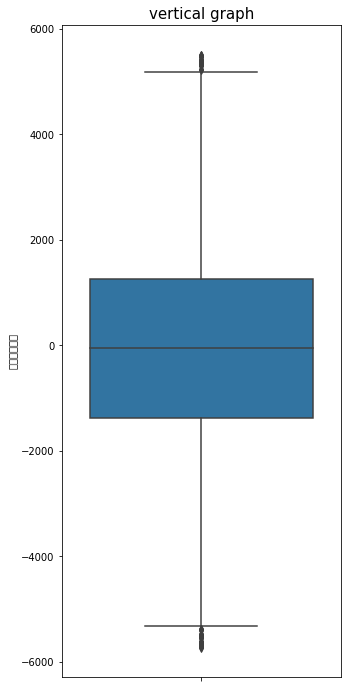

In [228]:
# 세로 그래프
plt.figure(figsize = (5,12))
sns.boxplot(y='외국인순매수', data = df)
plt.title('vertical graph', size = 15)
plt.show()

In [229]:
df

,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수
1,2704.71,-0.0086,2022-04-22,8362,-1556,-6975
2,2728.21,0.0035,2022-04-21,-5667,-597,6366
3,2718.69,-0.0001,2022-04-20,738,948,-1612
4,2718.89,0.0095,2022-04-19,-3431,331,3364
5,2693.21,-0.0011,2022-04-18,1020,-947,-188
...,...,...,...,...,...,...
4276,870.84,-0.0005,2005-01-07,1143,178,-1321
4277,871.28,-0.0157,2005-01-06,858,-6,-852
4278,885.19,-0.0019,2005-01-05,10,246,-256
4279,886.90,-0.0076,2005-01-04,-63,397,-334


In [232]:
df.to_csv('/content/drive/MyDrive/Finance data/일별_외인순매수량_이상치제거.csv')

In [233]:
read = pd.read_csv('/content/drive/MyDrive/Finance data/일별_외인순매수량_이상치제거.csv')

In [234]:
read

,Unnamed: 0,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수
0,1,2704.71,-0.0086,2022-04-22,8362,-1556,-6975
1,2,2728.21,0.0035,2022-04-21,-5667,-597,6366
2,3,2718.69,-0.0001,2022-04-20,738,948,-1612
3,4,2718.89,0.0095,2022-04-19,-3431,331,3364
4,5,2693.21,-0.0011,2022-04-18,1020,-947,-188
...,...,...,...,...,...,...,...
4055,4276,870.84,-0.0005,2005-01-07,1143,178,-1321
4056,4277,871.28,-0.0157,2005-01-06,858,-6,-852
4057,4278,885.19,-0.0019,2005-01-05,10,246,-256
4058,4279,886.90,-0.0076,2005-01-04,-63,397,-334
